In [1]:
import os, sys, glob

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal

import mne

import tensorpac
import pactools

In [2]:
# Set subject ID
subj_id = 10

print(os.listdir('../'))
outputs_path = '../outputs'
data_path = '../data'
meg_dir = os.path.join(data_path, f'subj_{subj_id}', 'meg')
mri_dir = os.path.join(data_path, f'subj_{subj_id}', 'mri')
fs_subjs_dir = os.path.join(data_path, 'fs_subjects_dir')

['.DS_Store', 'codes', 'data', 'plots_molly', 'outputs']


In [3]:

def mk_epochs_new(meg,  mod_freq=None, tmin=None, tmax=None, baseline=None, annot_pattern='', new_event_value=100):
    """This function creates epochs based on specified mod_freq and annotation_pattern
    Arguments:
        meg: annotated MNE object, where bad time spans are annotated as BAD_*
        tmin: start time of the epoch in seconds. This parameter should match with baseline.
        baseline: to specify baseline correction. e.g. tmin=0, baseline=(0, 0) applies no baseline correction.
        mod_freq: to specify the modulating frequency of interest. This parameter should match with the annot_pattern
        annot_pattern: The annotation pattern, based on which epochs are created.
        new_event_value: to specify new label for events. The default is 100. Optional argument.
    Returns:
        epoch: Epoch MNE object.
    Example1:
        The following call will create epochs from mod_freq=1 and encoding events, and will apply baseline correction
        between -0.5 and 0. The length of created epochs would be 8/mod_freq + abs(tmin) = 8 + 0.5 = 8.5 seconds or
        8.5 * sfreq = 8.5 * 300 samples
        mk_epochs(meg.copy(), mod_freq=1., tmin=-0.5, baseline=(-0.5, 0), annot_pattern='e/1.0/')
    Example2:
        create epochs from maintenance events with mod_freq=3.5
        mk_epochs(meg.copy(), mod_freq=3.5, tmin=0, baseline=(0, 0), annot_pattern='m/3.5/')
    Notes:
        tmin and annotation patterns should match.
        baseline = (None, 0) sets baseline to MNE defaults.
        baseline = (0, 0), tmin = 0 sets to no baseline.
        baseline = (-0.5, 0), tmin = -0.5
    """
    if not tmax:
        tmax = (8 / mod_freq) - 1 / meg.info['sfreq']
    events = mne.events_from_annotations(meg)
    annot = list(events[1].keys())
    indx_pattern = np.where([annot_pattern in k for k in annot])[0].tolist()
    event_vals_pattern = np.array(list(events[1].values()))[indx_pattern].tolist()
    indx_events = np.where(np.isin(events[0][:, 2], event_vals_pattern))[0].tolist()
    events4epoch = events[0][indx_events, :]
    events4epoch[:, 2] = new_event_value
    annot_epoch = mne.annotations_from_events(events4epoch, meg.info['sfreq'])
    meg.set_annotations(annot_epoch)
    epoch = mne.Epochs(meg, events=events4epoch, tmin=tmin, tmax=tmax, baseline=baseline)
    return epoch

In [4]:
# Load after-ICA MEG data and make epochs
meg = mne.io.read_raw_fif(os.path.join(meg_dir, 'after_ica_meg.fif'))


Opening raw data file ../data/subj_10/meg/after_ica_meg.fif...
    Read 5 compensation matrices
    Range : 0 ... 1525967 =      0.000 ...  5086.557 secs
Ready.
Opening raw data file /Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/codes/../data/subj_10/meg/after_ica_meg-1.fif...
    Read 5 compensation matrices
    Range : 1525968 ... 2103623 =   5086.560 ...  7012.077 secs
Ready.
Current compensation grade : 3


In [5]:
epoch = mk_epochs_new(meg.copy(), mod_freq=2., tmin=-0.2, baseline=(-0.2, 0), 
                   annot_pattern='e/2.0/', new_event_value=101)

Used Annotations descriptions: ['e/1.0/e0/t0/f/r1', 'e/1.0/e0/t0/s/r0', 'e/1.0/e0/t0/s/r1', 'e/1.0/e0/tpi/f/r0', 'e/1.0/e0/tpi/f/r1', 'e/1.0/e0/tpi/s/r0', 'e/1.0/e0/tpi/s/r1', 'e/1.0/epi/t0/f/r0', 'e/1.0/epi/t0/f/r1', 'e/1.0/epi/t0/s/r0', 'e/1.0/epi/t0/s/r1', 'e/1.0/epi/tpi/f/r0', 'e/1.0/epi/tpi/f/r1', 'e/1.0/epi/tpi/s/r0', 'e/1.0/epi/tpi/s/r1', 'e/1.5/e0/t0/f/r0', 'e/1.5/e0/t0/f/r1', 'e/1.5/e0/t0/s/r0', 'e/1.5/e0/t0/s/r1', 'e/1.5/e0/tpi/f/r0', 'e/1.5/e0/tpi/f/r1', 'e/1.5/e0/tpi/s/r0', 'e/1.5/e0/tpi/s/r1', 'e/1.5/epi/t0/f/r1', 'e/1.5/epi/t0/s/r0', 'e/1.5/epi/t0/s/r1', 'e/1.5/epi/tpi/f/r0', 'e/1.5/epi/tpi/f/r1', 'e/1.5/epi/tpi/s/r0', 'e/1.5/epi/tpi/s/r1', 'e/2.0/e0/t0/f/r0', 'e/2.0/e0/t0/f/r1', 'e/2.0/e0/t0/s/r0', 'e/2.0/e0/t0/s/r1', 'e/2.0/e0/tpi/f/r0', 'e/2.0/e0/tpi/f/r1', 'e/2.0/e0/tpi/s/r0', 'e/2.0/e0/tpi/s/r1', 'e/2.0/epi/t0/f/r0', 'e/2.0/epi/t0/f/r1', 'e/2.0/epi/t0/s/r0', 'e/2.0/epi/t0/s/r1', 'e/2.0/epi/tpi/f/r0', 'e/2.0/epi/tpi/f/r1', 'e/2.0/epi/tpi/s/r0', 'e/2.0/epi/tpi/s/r1', '

In [6]:
mne.viz.use_browser_backend('qt')
#epoch.plot(n_epochs=10, n_channels=50, scalings='auto', show=True, block=True)

In [7]:
# Covariance Matrices
data_cov = mne.compute_covariance(epoch, tmin=0.0, tmax=3.5,
                                  method='empirical')
noise_cov = mne.compute_covariance(epoch, tmin=-0.2, tmax=-0.05,
                                   method='empirical')


Removing 5 compensators from info because not all compensation channels were picked.
Loading data for 72 events and 1260 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.1e-08 (2.2e-16 eps * 275 dim * 3.4e+05  max singular value)
    Estimated rank (mag): 275
    MAG: rank 275 computed from 275 data channels with 0 projectors
Reducing data rank from 275 -> 275
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 75672
[done]
Removing 5 compensators from info because not all compensation channels were picked.
Loading data for 72 events and 1260 original time points ...
Computing rank from data with rank=None
    Using tolerance 3.4e-09 (2.2e-16 eps * 275 dim * 5.6e+04  max singular value)
    Estimated rank (mag): 275
    MAG: rank 275 computed from 275 data channels with 0 projectors
Reducing data rank from 275 -> 275
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 3312
[done]


Removing 5 compensators from info because not all compensation channels were picked.
Computing rank from covariance with rank=None
    Using tolerance 5.8e-14 (2.2e-16 eps * 275 dim * 0.95  max singular value)
    Estimated rank (mag): 264
    MAG: rank 264 computed from 275 data channels with 0 projectors


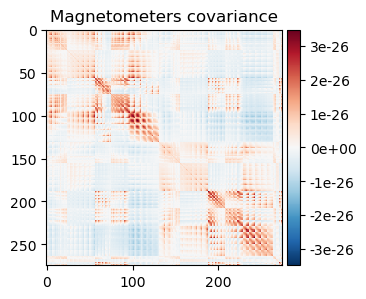

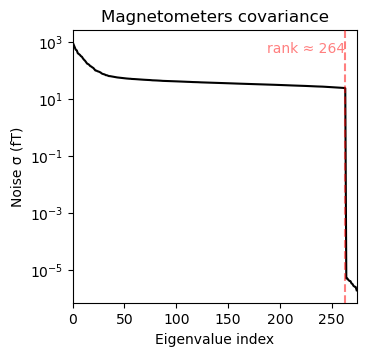

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [8]:
mne.viz.use_browser_backend('matplotlib')
mne.viz.plot_cov(noise_cov, meg.info)

In [9]:
# Load forward model
fwd = mne.read_forward_solution(os.path.join(mri_dir, 'file-fwd.fif'))


Reading forward solution from /Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/codes/../data/subj_10/mri/file-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (8196 sources, 275 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


resources:
https://mne.tools/stable/auto_examples/inverse/compute_mne_inverse_epochs_in_label.html


In [10]:
# Source Reconstruction: MNE
inv_operator = mne.minimum_norm.make_inverse_operator(epoch.info, fwd, data_cov,
                                                      loose=0.2, depth=0.8, verbose=True)

Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 275 channels.
    275 out of 275 channels remain after picking
Removing 5 compensators from info because not all compensation channels were picked.
Selected 275 channels
Creating the depth weighting matrix...
    275 magnetometer or axial gradiometer channels
    limit = 8061/8196 = 10.049720
    scale = 5.22418e-11 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
Removing 5 compensators from info because not all compensation channels were picked.
Computing rank from covariance with rank=None
    Using tolerance 9.2e-14 (2.2e-16 eps * 275 dim * 1.5  max singular value)
    Estimated rank (mag): 264
    MAG: rank 264 computed from 275 data channels with 0 projectors
    Setting small MAG e

In [12]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
# Change this to free orientation according to 
# https://mne.tools/stable/generated/mne.minimum_norm.apply_inverse_epochs.html
stc = mne.minimum_norm.apply_inverse_epochs(epoch, inv_operator, lambda2, method=method, 
                           pick_ori='normal', verbose=True)

Removing 5 compensators from info because not all compensation channels were picked.
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 264 (11 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 275 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 72
Processing epoch : 2 / 72
Processing epoch : 3 / 72
Processing epoch : 4 / 72
Processing epoch : 5 / 72
Processing epoch : 6 / 72
Processing epoch : 7 / 72
Processing epoch : 8 / 72
Processing epoch : 9 / 72
Processing epoch : 10 / 72
Processing epoch : 11 / 72
Processing epoch : 12 / 72
Processing epoch : 13 / 72
Processing epoch : 14 / 72
Processing epoch : 15 / 72
Processing epoch : 16 / 72
Processing epoch : 17 / 72
Process

In [13]:
print(len(stc), stc[0].shape)
print(dir(stc[0]))
#stc[0].plot(subjects_dir=fs_subjs_dir, subject=f'subj_{subj_id}', hemi='both')

72 (8196, 1260)
['__abs__', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__ipow__', '__isub__', '__itruediv__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pos__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_data', '_data_ndim', '_handle_tmin_tmax', '_hemilabel_stc', '_kernel', '_kernel_removed', '_n_vertices', '_remove_kernel_sens_data_', '_sens_data', '_set_times', '_src_count', '_src_type', '_times', '_tmin', '_tstep', '_update_first_last', '_update_times', 'apply_baseline', 'bin', 'center_of_mass', 'copy', 'crop', 'data', 'decimate', 'estimate_snr', 'expand', 'extract_label_time_course', 'get_peak', 'in_lab

### Add atlas and generate labels

In [11]:
# Read Atlas labels
labels = mne.read_labels_from_annot(subject='subj_10', parc='BN_Atlas', hemi='both', 
                                   surf_name='white', annot_fname=None, regexp=None, 
                                   subjects_dir=fs_subjs_dir, sort=True, verbose=False)

label2index = {label.name: i for i, label in enumerate(labels)}
label2index['A1/2/3ll_L-lh']

0

### ERF Evoked (all cortext)

In [19]:
evoked = epoch.average()

# Covariance Matrices
data_cov = mne.compute_covariance(epoch, tmin=0.005, tmax=7.5,
                                  method='empirical')
noise_cov = mne.compute_covariance(epoch, tmin=-0.3, tmax=0,
                                   method='empirical')


# Source Reconstruction: MNE
inv_evoked = mne.minimum_norm.make_inverse_operator(evoked.info, fwd, data_cov, loose=0., depth=0.8,
                            verbose=False)


snr = 3.0
lambda2 = 1.0 / snr ** 2
kwargs = dict(subject='subj_10', initial_time=0.1, hemi='rh', subjects_dir=fs_subjs_dir,
              size=(600, 600), clim=dict(kind='percent', lims=[90, 95, 99]),
              smoothing_steps=7)

stc = abs(mne.minimum_norm.apply_inverse(evoked, inv_evoked, lambda2, 'MNE', verbose=False))
brain = stc.plot(figure=1, **kwargs)
brain.add_text(0.1, 0.9, 'MNE', 'title', font_size=14)


Removing 5 compensators from info because not all compensation channels were picked.
Loading data for 72 events and 1260 original time points ...
Computing rank from data with rank=None
    Using tolerance 2.2e-08 (2.2e-16 eps * 275 dim * 3.6e+05  max singular value)
    Estimated rank (mag): 275
    MAG: rank 275 computed from 275 data channels with 0 projectors
Reducing data rank from 275 -> 275
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 86256
[done]
Removing 5 compensators from info because not all compensation channels were picked.
Loading data for 72 events and 1260 original time points ...
Computing rank from data with rank=None
    Using tolerance 3.9e-09 (2.2e-16 eps * 275 dim * 6.4e+04  max singular value)
    Estimated rank (mag): 275
    MAG: rank 275 computed from 275 data channels with 0 projectors
Reducing data rank from 275 -> 275
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 4392
[done]
Using control points [5.57948898e-1

/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/pyvistaqt/plotting.py:733: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  self.app_window.setBaseSize(*window_size)


1   HIToolbox                           0x00007ff825a5d726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8259ccce3 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1125
3   HIToolbox                           0x00007ff825a5d173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
4   AppKit                              0x00007ff81f52a287 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
5   AppKit                              0x00007ff81f37f055 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
6   CoreFoundation                      0x00007ff81c0943d4 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 137
7   CoreFoundation                      0x00007ff81c12e41a ___CFXRegistrationPost_block_invoke + 88
8   CoreFoundation                      0x00007ff81c12e369 _CFXRegistrationPost + 536
9   CoreFoundation                      0x00007ff81c0678f9 _CFXNotificationPost +

### ERF Epochs (for a label)

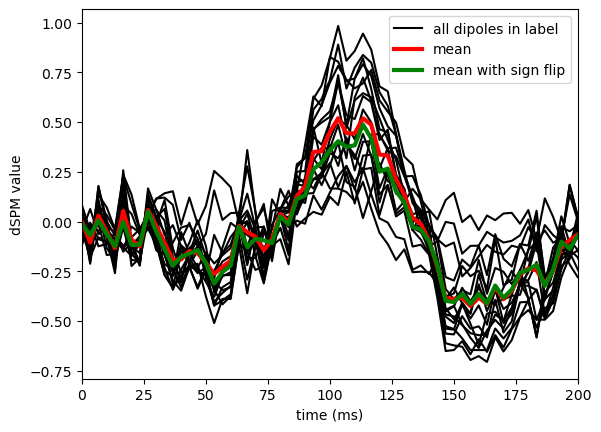

In [20]:
stg_l = ['A38m_L-lh', 'A41/42_L-lh', 'TE1.0/TE1.2_L-lh', 'A22c_L-lh',  'A22r_L-lh']    #'A38l_L-lh',
stg_r = ['A38m_R-rh', 'A41/42_R-rh', 'TE1.0/TE1.2_R-rh', 'A22c_R-rh', 'A22r_R-rh'] # , 'A38l_R-rh'

label_name = 'A22r_R-rh'
indx_roi = label2index[label_name]
label = labels[indx_roi]  
# compute sign flip to avoid signal cancellation when averaging signed values
flip = mne.label_sign_flip(label, inv_operator['src'])

method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
# Change this to free orientation according to 
# https://mne.tools/stable/generated/mne.minimum_norm.apply_inverse_epochs.html
stc_label = mne.minimum_norm.apply_inverse_epochs(epoch, inv_operator, lambda2, method=method, label=label,
                           pick_ori='normal', verbose=False)

# Mean across trials but not across vertices in label
mean_stc = sum(stc_label) / len(stc_label)

label_mean = np.mean(mean_stc.data, axis=0)
label_mean_flip = np.mean(flip[:, np.newaxis] * mean_stc.data, axis=0)


times = 1e3 * stc_label[0].times  # times in ms

plt.figure()
h0 = plt.plot(times, mean_stc.data.T, 'k')
h1, = plt.plot(times, label_mean, 'r', linewidth=3)
h2, = plt.plot(times, label_mean_flip, 'g', linewidth=3)
plt.legend((h0[0], h1, h2), ('all dipoles in label', 'mean',
                             'mean with sign flip'))
plt.xlabel('time (ms)')
plt.ylabel('dSPM value')
plt.xlim(0, 200 )
plt.show()

### ERF Epochs (All sources)

In [24]:
stg_l = ['A38m_L-lh', 'A41/42_L-lh', 'TE1.0/TE1.2_L-lh', 'A22c_L-lh',  'A22r_L-lh']    #'A38l_L-lh',
stg_r = ['A38m_R-rh', 'A41/42_R-rh', 'TE1.0/TE1.2_R-rh', 'A22c_R-rh', 'A22r_R-rh'] # , 'A38l_R-rh'

label_name = 'A22r_R-rh'
indx_roi = label2index[label_name]
label = labels[indx_roi]  

# compute sign flip to avoid signal cancellation when averaging signed values
flip = mne.label_sign_flip(label, inv_operator['src'])

method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
# Change this to free orientation according to 
# https://mne.tools/stable/generated/mne.minimum_norm.apply_inverse_epochs.html
stc = mne.minimum_norm.apply_inverse_epochs(epoch, inv_operator, lambda2, method=method, 
                           pick_ori='normal', verbose=False)

stc_label = [k.in_label(label) for k in stc]
# Mean across trials but not across vertices in label
mean_stc = sum(stc_label) / len(stc_label)

label_mean = np.mean(mean_stc.data, axis=0)
label_mean_flip = np.mean(flip[:, np.newaxis] * mean_stc.data, axis=0)

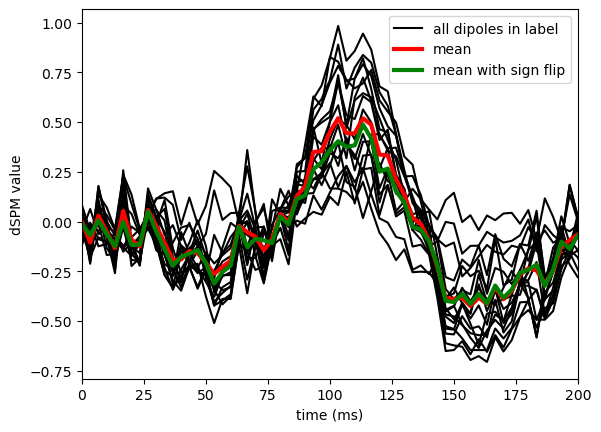

In [25]:
times = 1e3 * stc_label[0].times  # times in ms

plt.figure()
h0 = plt.plot(times, mean_stc.data.T, 'k')
h1, = plt.plot(times, label_mean, 'r', linewidth=3)
h2, = plt.plot(times, label_mean_flip, 'g', linewidth=3)
plt.legend((h0[0], h1, h2), ('all dipoles in label', 'mean',
                             'mean with sign flip'))
plt.xlabel('time (ms)')
plt.ylabel('dSPM value')
plt.xlim(0, 200 )
plt.show()

### ERF Epochs using pca across vertices in label

In [26]:
stc[0].extract_label_time_course(labels=label, src=inv_operator['src'], mode='pca_flip').shape

Extracting time courses for 1 labels (mode: pca_flip)


(1, 1260)

In [42]:
# Time course for all epochs and all labels (pca across dipoles)


stc_labels = np.array([k.extract_label_time_course(labels=labels, src=inv_operator['src'], mode='pca_flip', verbose=False) for k in stc])
stc_labels.shape # (num_epochs, num_labels, num_times)

(72, 212, 1260)

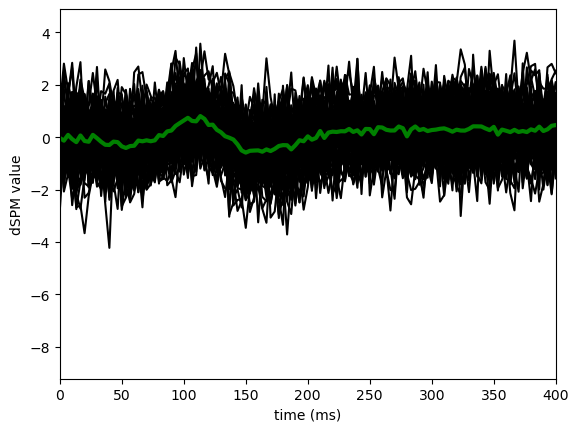

In [59]:
label_name = 'A22r_R-rh'
indx_roi = label2index[label_name]
stc_label = stc_labels[:, indx_roi, :]

plt.figure()
h0 = plt.plot(times, stc_label.squeeze().T, 'k')
h0 = plt.plot(times, stc_label.mean(axis=0), 'g', linewidth=3)
plt.xlabel('time (ms)')
plt.ylabel('dSPM value')
plt.xlim(0, 400 )
plt.show()

## ITC

In [57]:


def calc_itc(sig, sfreq):
    """
    This function computes ITPC from epoched time series

    Args:
        sig: epochs x channels x time points
        sfreq: sampling frequency
        
    Returns:
        itpc: Inter-trial phase coherence.
    """
    nepoch, nchan, ntp = sig.shape
    sig = np.reshape(sig, (-1, ntp))  # convert epochs @ channels @ time-points to  (epochs . channels) @ time-points
    nfft = ntp
    xwin = signal.windows.hann(ntp).reshape(1, -1)
    #plt.plot(xwin)
    sig = sig * xwin
    #plt.plot(sig)

    # Compute FFT
    F = scipy.fft.fft(sig)
    xfreq = np.arange(nfft/2) * (sfreq/nfft)
    #xf = fftfreq(ntp, 1/sfreq)[:ntp//2]
    #plt.plot(xfreq, np.abs(F[0,:ntp//2]))

    # Compute power, amplitude, and phase spectra
    AS = 2/xwin.sum() * np.sqrt(F*np.conjugate(F))  # amplitude spectrum
    S = F * np.conjugate(F) / xwin.sum()  # Power spectrum
    P = np.arctan(np.imag(F) / np.real(F))  # Phase spectrum

    # shorten matrix by half
    AS = AS[:, :ntp//2]
    S = S[:, :ntp//2]
    P = P[:, :ntp//2]
    F = F[:, :ntp//2]

    # Reshape Fourier matrix to its to initial shape
    F = F.reshape((nepoch, nchan, ntp//2))

    # inter-trial phase coherence
    itpc = np.squeeze(np.abs(np.mean(F/np.abs(F), axis=0)))  # Channel 68
    # evoked power
    epow = np.squeeze(np.abs(np.mean(F, axis=0)) ** 2)
    # total power
    tpow = np.squeeze(np.mean(np.abs(F) ** 2, axis=0))

    return itpc, xfreq, epow, tpow, F


In [60]:
print(stc_label.shape)
stc_label = stc_label[:, np.newaxis, :]
print(stc_label.shape)

(72, 1260)
(72, 1, 1260)


In [67]:
itpc, xfreq, epow, tpow, F = calc_itc(stc_labels, meg.info['sfreq'])
print(itpc.shape, xfreq.shape, epow.shape, tpow.shape, F.shape)

(212, 630) (630,) (212, 630) (212, 630) (72, 212, 630)


(0.0, 5.0)

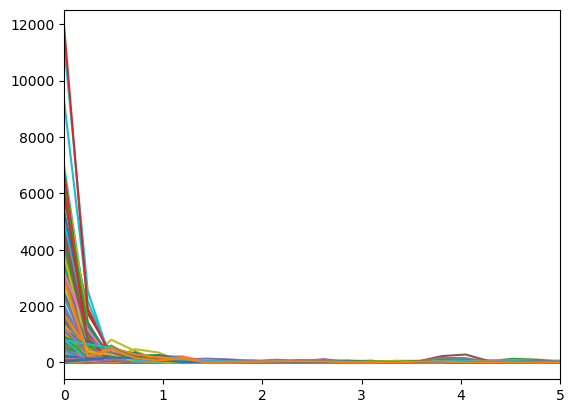

In [68]:
plt.plot(xfreq, epow.T)
plt.xlim(0, 5)

In [80]:
seed_l = 'A41/42_L-lh'
indx_seed_l = atlas_labels.index(seed_l)

seed_r = 'A41/42_R-rh'
indx_seed_r = atlas_labels.index(seed_r)

# Plot seed ROIs 
Brain = mne.viz.get_brain_class()
brain = Brain('subj_10', hemi='both', surf='inflated',
              subjects_dir=fs_subjs_dir, size=(800, 600))
#brain.add_label(label[indx_seed_l], hemi='lh', color='green', borders=False)
#brain.add_label(label[indx_seed_r], hemi='rh', color='green', borders=False)

In [119]:
write_path = '../plots_molly/'
os.listdir()

['test.eps',
 'tensorpac_examples',
 'srcs_pac.ipynb',
 'copied_codes',
 'workflow_source_reconstruction.py',
 'workflow_source_analysis.py',
 'wf_sr_phamp.py',
 'wf_source_reconstruction_itc.py',
 'wf_source_reconstruction.py',
 'wf_sr_tfr.py']

In [133]:
# Vsualize atlas rois

atlas_view_names, atlas_view_angles = ['right', 'left'], [0, 180]
atlas_view_tesselations = 'colored'#border'

for k in range(2):
    # visualize atlas labels
    brain = Brain('subj_10', 'both', 'inflated', subjects_dir=fs_subjs_dir, 
                cortex='low_contrast', background='white', size=(800, 600))
    brain.add_annotation('BN_Atlas', borders=False)
    #brain.add_head() needs head surface in subj_10/surf/lh.seghead  or /subj_10/bem/subj_10-head-dense.fif
    # brain.add_sensors(meg.info, trans='fsaverage') the transformation file needed
    brain.show_view(azimuth=atlas_view_angles[k], distance=450)
    brain.save_image(filename=os.path.join(write_path, 'atlas_seed', f'atlas_{atlas_view_names[k]}_{atlas_view_tesselations}.png'), mode='rgb')
    brain.save_image(filename=os.path.join(write_path, 'atlas_seed', f'atlas_{atlas_view_names[k]}_{atlas_view_tesselations}.eps'), mode='rgb')


In [79]:
# Visualize the Seed ROI

seed_l = 'A41/42_L-lh'
indx_seed_l = label2index[seed_l]

seed_r = 'A41/42_R-rh'
indx_seed_r = label2index(seed_r)
brain = Brain('subj_10', 'lh', 'inflated', subjects_dir=fs_subjs_dir,
              
              cortex='low_contrast', background='white', size=(800, 600))
brain.add_annotation('BN_Atlas')
brain.add_label(labels[label2index[seed_l]], hemi='lh', color='green', borders=False)

In [138]:
seedl_tcs = roi_tcs[:, indx_seed_l, :]
seedr_tcs = roi_tcs[:, indx_seed_r, :]
print(seedl_tcs.shape, seedr_tcs.shape)

(72, 1260) (72, 1260)


In [155]:
# define a pac object and extract high-resolution phases and amplitudes using
# Morlet's wavelets
p = tensorpac.Pac(f_pha=[1.75, 2, 2.75], f_amp=[8, 13], dcomplex='wavelet')
phtcs_sr = p.filter(meg.info['sfreq'], seedr_tcs, ftype='phase', n_jobs=1)
phtcs_sl = p.filter(meg.info['sfreq'], seedl_tcs, ftype='phase', n_jobs=1)
amplitudes = np.stack([p.filter(meg.info['sfreq'], roi_tcs[:, i, :], ftype='amplitude', n_jobs=1) for i in range(roi_tcs.shape[1])], axis=1).squeeze()
print(phtcs_sr.shape, phtcs_sr.shape,  amplitudes.shape)

Phase Amplitude Coupling object defined


(2, 72, 1260) (2, 72, 1260) (212, 72, 1260)


In [168]:
p.idpac = (1, 0, 0)#(1, 1, 3)

"""
First digit : refer to the method for computing PAC
1 : Mean Vector Length (MVL) [4] (see tensorpac.methods.mean_vector_length())
2 : Modulation Index (MI) [11] (see tensorpac.methods.modulation_index())
3 : Heights Ratio (HR) [9] (see tensorpac.methods.heights_ratio())
4 : ndPAC [13] (see tensorpac.methods.norm_direct_pac())
5 : Phase-Locking Value (PLV) [10][8] (see tensorpac.methods.phase_locking_value())
6 : Gaussian Copula PAC (GCPAC) [6] (see

Second digit : refer to the method for computing surrogates
0 : No surrogates
1 : Swap phase / amplitude across trials [11] (see tensorpac.methods.swap_pha_amp())
2 : Swap amplitude time blocks [2] (see tensorpac.methods.swap_blocks())
3 : Time lag [4] (see tensorpac.methods.time_lag())

Third digit : refer to the normalization method for correction
0 : No normalization
1 : Substract the mean of surrogates
2 : Divide by the mean of surrogates
3 : Substract then divide by the mean of surrogates
4 : Z-score
"""

WARNING | MVL is amplitude dependent which means that if the amplitude increases, MVL also increases. You should select a normalization method for correcting this limitation (e.g idpac=(1, 2, 4))


'\nFirst digit : refer to the method for computing PAC\n1 : Mean Vector Length (MVL) [4] (see tensorpac.methods.mean_vector_length())\n2 : Modulation Index (MI) [11] (see tensorpac.methods.modulation_index())\n3 : Heights Ratio (HR) [9] (see tensorpac.methods.heights_ratio())\n4 : ndPAC [13] (see tensorpac.methods.norm_direct_pac())\n5 : Phase-Locking Value (PLV) [10][8] (see tensorpac.methods.phase_locking_value())\n6 : Gaussian Copula PAC (GCPAC) [6] (see\n\nSecond digit : refer to the method for computing surrogates\n0 : No surrogates\n1 : Swap phase / amplitude across trials [11] (see tensorpac.methods.swap_pha_amp())\n2 : Swap amplitude time blocks [2] (see tensorpac.methods.swap_blocks())\n3 : Time lag [4] (see tensorpac.methods.time_lag())\n\nThird digit : refer to the normalization method for correction\n0 : No normalization\n1 : Substract the mean of surrogates\n2 : Divide by the mean of surrogates\n3 : Substract then divide by the mean of surrogates\n4 : Z-score\n'

In [170]:
pac = p.fit(phtcs_sr, amplitudes)

    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)


In [191]:
pac_mean = pac.mean((-2, -1))
pac_mean.shape

(212,)

In [273]:
pac_mean_hr = mne.labels_to_stc(labels, pac_mean, tmin=0, tstep=1, subject='subj_10', src=None, verbose=None)

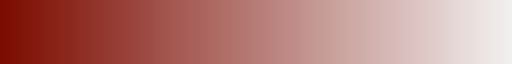

In [386]:
# Set up colormap
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

import seaborn as sns
cmap = sns.diverging_palette(220, 20,  s=150, sep=50, l=25, as_cmap=True)
cmap = truncate_colormap(cmap, 0.6, 1).reversed()
cmap

In [384]:
brain_kwargs = dict(alpha=0.5, background='white', cortex='low_contrast')
brain = mne.viz.Brain('subj_10', hemi='both', surf='inflated', subjects_dir=fs_subjs_dir, **brain_kwargs)
kwargs = dict(fmin=pac_mean_hr.data.min(), fmax=pac_mean_hr.data.max(), alpha=0.75,
              smoothing_steps='nearest', colormap=cmap)
brain.add_data(pac_mean_hr.lh_data, hemi='lh', vertices=pac_mean_hr.lh_vertno, **kwargs)
brain.add_data(pac_mean_hr.rh_data, hemi='rh', vertices=pac_mean_hr.rh_vertno, **kwargs)
brain.add_label(labels[label2index[seed_l]], hemi='lh', color='green', borders=True)
#brain.add_sensors(meg.info, trans)

In [320]:
print(dir(cmap))

['N', '__call__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_gamma', '_i_bad', '_i_over', '_i_under', '_init', '_isinit', '_lut', '_repr_html_', '_repr_png_', '_reverser', '_rgba_bad', '_rgba_over', '_rgba_under', '_segmentdata', '_set_extremes', 'colorbar_extend', 'copy', 'from_list', 'get_bad', 'get_over', 'get_under', 'is_gray', 'monochrome', 'name', 'resampled', 'reversed', 'set_bad', 'set_extremes', 'set_gamma', 'set_over', 'set_under', 'with_extremes']


In [195]:
print(dir(labels[0]))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_load_surface', 'center_of_mass', 'color', 'comment', 'compute_area', 'copy', 'distances_to_outside', 'filename', 'fill', 'get_tris', 'get_vertices_used', 'hemi', 'morph', 'name', 'pos', 'restrict', 'save', 'smooth', 'split', 'subject', 'values', 'vertices']


In [177]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

import mne
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()
subjects_dir = data_path / 'subjects'
sample_dir = data_path / 'MEG' / 'sample'

Automatically created module for IPython interactive environment


In [217]:
8196
stc[2].lh_data.shape

(4098, 1260)

In [225]:
brain_kwargs = dict(alpha=0.5, background='white', cortex='low_contrast')
brain = mne.viz.Brain('subj_10', hemi='both', surf='inflated', subjects_dir=fs_subjs_dir, **brain_kwargs)
brain.add_data(stc[0].lh_data[:, 0], hemi='lh', vertices=stc[0].lh_vertno)


In [208]:
brain_kwargs = dict(alpha=0.1, background='white', cortex='low_contrast')
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)

stc = mne.read_source_estimate(sample_dir / 'sample_audvis-meg')
stc.crop(0.09, 0.1)
kwargs = dict(fmin=stc.data.min(), fmax=stc.data.max(), alpha=0.25,
              smoothing_steps='nearest', time=stc.times)
brain.add_data(stc.lh_data[:, 0], hemi='lh', vertices=stc.lh_vertno, **kwargs)
brain.add_data(stc.rh_data[:, 0], hemi='rh', vertices=stc.rh_vertno, **kwargs)


In [209]:
print(dir(brain))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_actors', '_add_actor', '_add_label_glyph', '_add_vertex_glyph', '_add_volume_data', '_advance', '_alpha', '_annotation_labels', '_annots', '_bg_color', '_block', '_brain_color', '_check_hemi', '_check_hemis', '_check_stc', '_clean', '_cleaned', '_clear_callbacks', '_clear_widgets', '_closed', '_cmap_range', '_configure_dock', '_configure_dock_colormap_widget', '_configure_dock_orientation_widget', '_configure_dock_playback_widget', '_configure_dock_time_widget', '_configure_dock_trace_widget', '_configure_help', '_configure_label_time_course', '_configure_menu', '_configure_mplcanvas', '_configure_picking', '_configure_playback', '_configure_sca

In [207]:
stc.lh_vertno.shape

(3732,)

In [183]:
stc.lh_data[:10, :]
stc.lh_vertno.shape

(3732,)

In [ ]:
vcs = np.concatenate([k.vertices for k in labels], axis=0)
vcs.shape

In [ ]:
# Group Source analysis
"""
Group analysis is facilitated by morphing source estimates, which can be done e.g., to subject='fsaverage' as:

morph = mne.compute_source_morph(stc, subject_from='sample', subject_to='fsaverage')  
stc_fsaverage = morph.apply(stc)  
"""


